In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2  
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import os

%pip install nbformat
%pip install import_ipynb

import import_ipynb

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 50000/50000 [00:19<00:00, 2554.70it/s]


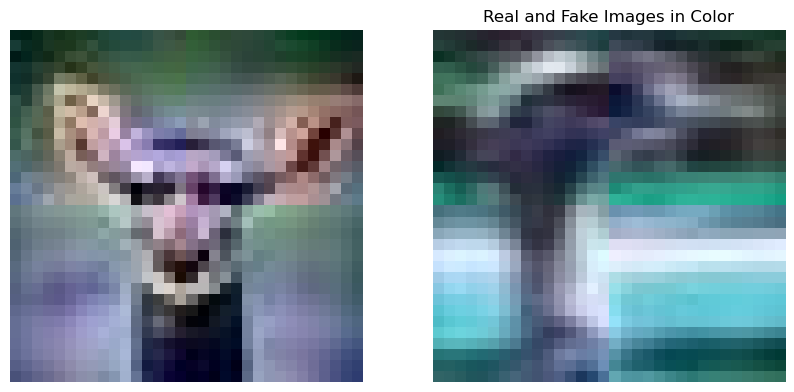

In [2]:
train_fake = '../archive/train/FAKE'
train_real = '../archive/train/REAL'
test_fake = '../archive/test/FAKE'
test_real = '../archive/test/REAL'
image_size = 32


# Process fake images
fake_images = []
for image in tqdm(os.listdir(train_fake)): 
    path = os.path.join(train_fake, image)
    img = cv2.imread(path, cv2.IMREAD_COLOR) 
    img = cv2.resize(img, (image_size, image_size))
    norm = np.zeros((800,800))
    img = cv2.normalize(img, norm, 0, 255, cv2.NORM_MINMAX)  
    fake_images.append(img)

# Process real images
real_images = []
for image2 in tqdm(os.listdir(train_real)): 
    path = os.path.join(train_real, image2)
    img2 = cv2.imread(path, cv2.IMREAD_COLOR) 
    img2 = cv2.resize(img2, (image_size, image_size))
    norm = np.zeros((800,800))
    img2 = cv2.normalize(img2, norm, 0, 255, cv2.NORM_MINMAX)
    real_images.append(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(fake_images[0])  # Display the first fake image
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(real_images[0])  # Display the first real image
plt.axis('off')
plt.title("Real and Fake Images in Color")
plt.show()

In [3]:
def train_data():
    train_data_fake =[] 
    train_data_real=[]
    for image in tqdm(os.listdir(train_fake)): 
        path = os.path.join(train_fake, image)
        img = cv2.imread(path, cv2.IMREAD_COLOR) 
        img = cv2.resize(img, (image_size, image_size))
        norm = np.zeros((800,800))
        img = cv2.normalize(img, norm, 0, 255, cv2.NORM_MINMAX)  
        train_data_fake.append(img) 
    for image2 in tqdm(os.listdir(train_real)): 
        path = os.path.join(train_real, image2)
        img2 = cv2.imread(path, cv2.IMREAD_COLOR) 
        img2 = cv2.resize(img2, (image_size, image_size))
        norm = np.zeros((800,800))
        img2 = cv2.normalize(img2, norm, 0, 255, cv2.NORM_MINMAX)
        train_data_real.append(img2)
    
    train_data = np.concatenate((np.asarray(train_data_fake),np.asarray(train_data_real)),axis=0)
    return train_data 

def test_data():
    test_data_fake = [] 
    test_data_real=[]
    for image in tqdm(os.listdir(test_fake)): 
        path = os.path.join(test_fake, image)
        img = cv2.imread(path, cv2.IMREAD_COLOR) 
        img = cv2.resize(img, (image_size, image_size))
        norm = np.zeros((800,800))
        img = cv2.normalize(img, norm, 0, 255, cv2.NORM_MINMAX)  
        test_data_fake.append(img)
    for image2 in tqdm(os.listdir(test_real)): 
        path = os.path.join(test_real, image2)
        img2 = cv2.imread(path, cv2.IMREAD_COLOR) 
        img2 = cv2.resize(img2, (image_size, image_size))
        norm = np.zeros((800,800))
        img2 = cv2.normalize(img2, norm, 0, 255, cv2.NORM_MINMAX)
        test_data_real.append(img2) 
    
    test_data = np.concatenate((np.asarray(test_data_fake),np.asarray(test_data_real)),axis=0) 
    return test_data 

In [4]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 10000/10000 [00:04<00:00, 2487.87it/s]


In [5]:
x_data = np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

z1 = np.zeros(50000)
o1 = np.ones(50000)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10000)
o = np.ones(10000)
Y_test = np.concatenate((o, z), axis=0)

y_data = np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (120000, 32, 32, 3)
Y shape:  (120000, 1)


In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

# Flatten each image in x_train
num_samples, width, height, channels = x_train.shape
x_train = x_train.reshape(num_samples, -1)  # Flattening each image into a 1D array

# Flatten each image in x_train
num_samples, width, height, channels = x_test.shape
x_test = x_test.reshape(num_samples, -1)  # Flattening each image into a 1D array

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

logreg =  LogisticRegression(C = 0.01)
results = logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

loss = log_loss(y_test, y_pred, eps=1e-15)
score = logreg.score(x_test, y_test)
print("logistic regression accuracy, RGB: " + str(score))
print("logistic regression loss, Grayscale: " + str(loss))

logistic regression accuracy, RGB: 0.6715
logistic regression loss, Grayscale: 11.34611922412879



Classification Report - RGB - LR

              precision    recall  f1-score   support

        REAL       0.67      0.67      0.67      8916
        FAKE       0.67      0.67      0.67      9084

    accuracy                           0.67     18000
   macro avg       0.67      0.67      0.67     18000
weighted avg       0.67      0.67      0.67     18000



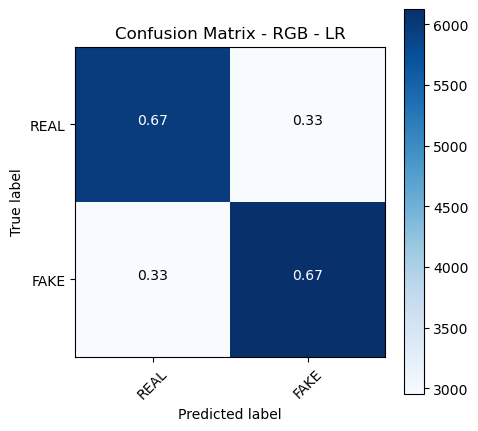

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools as it

def plot_confusion_matrix(cm, title, target_names, cmap=plt.cm.Blues):
    
    plt.figure(figsize=(5,5))

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    # NORMALIZE:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = np.around(cm, decimals=2)
    cm[np.isnan(cm)] = 0.0

    thresh = cm.max() / 2.
    for i, j in it.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    # plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, y_pred)

target_names = ['REAL', 'FAKE']

print('\nClassification Report - RGB - LR\n')
print(classification_report(y_test, y_pred, target_names=target_names))

plot_confusion_matrix(cm,title="Confusion Matrix - RGB - LR",target_names=target_names)

LOGISTIC REGRESSION CLASSIFICATION 
TOTALS: RGB

Num images: 18000
Num misclassified images: 5913
Num TP: 6124
Num TN: 5963
Num FP: 2960
Num FN: 2953


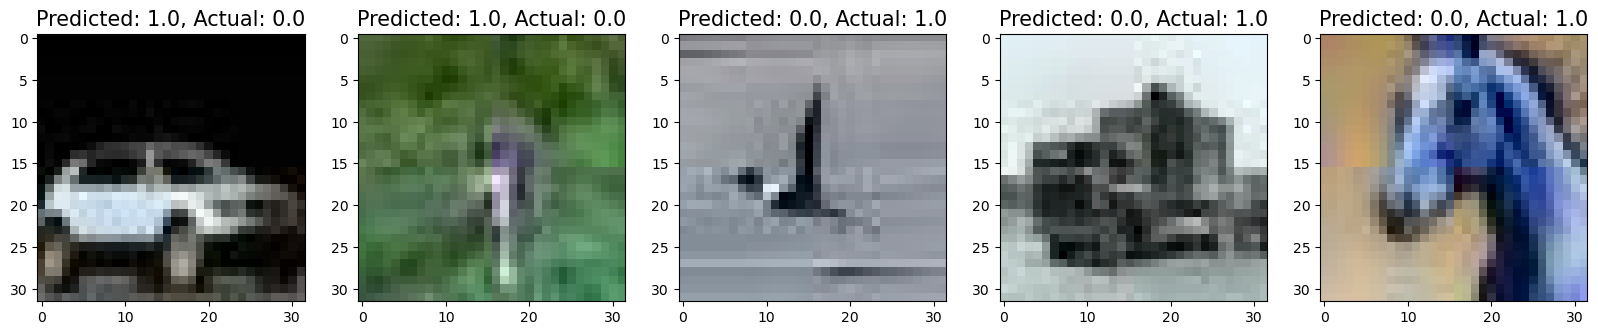

In [40]:
y_test = y_test.flatten()

TP,TN,FP,FN = [],[],[],[]

index = 0
misclassifiedIndexes = []
for label,predict in zip(y_test, y_pred):
  if label != predict:
    misclassifiedIndexes.append(index)
    if label == 1:
      FP.append(index)
    else:
      FN.append(index)
  else:
    if label == 1:
      TP.append(index)
    else:
      TN.append(index)
  index +=1

print("LOGISTIC REGRESSION CLASSIFICATION \nTOTALS: RGB\n")
print("Num images: " + str(len(y_test)))
print("Num misclassified images: " + str(len(misclassifiedIndexes)))
print("Num TP: " + str(len(TP)))
print("Num TN: " + str(len(TN)))
print("Num FP: " + str(len(FP)))
print("Num FN: " + str(len(FN)))

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(x_test[badIndex], (32,32,3)))
 plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y_test[badIndex]), fontsize = 15)

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(x_train, y_train)

# Retrieve the best hyperparameters
best_C = grid_search.best_params_['C']

print(best_C)

0.01
